# <font color="#ff9900"> **scikit-learn Básico - Classificação**</font>
---

``scikit-learn``  (https://scikit-learn.org/) é uma extensa e madura biblioteca *open-source* multiplataforma para análise de dados e *machine learning* (ML) em **Python**. Seu desenvolvimento é comunitário e possui licença BSD. Implementa vários algoritmos para tarefas básicas de ML como classificação, regressão e agrupamento. Amplamente utilizada na indústria e no meio acadêmico de pesquisa. 


---

> 💡 **Observação**: Para executar a célula de código (aquelas marcadas com `` []``), posicione dentro dela e pressione ``Ctrl``+``Enter``. Deve-se respeitar a sequência de execução das células.

---

Importação dos Módulos Auxiliares
--

Antes de mais nada vamos importar as bibliotecas ``numpy``  e ``matplotlib``  como auxiliares. 

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

# versions
print(f'numpy:{np.__version__}')


numpy:1.21.6


Importação de um *Dataset*
--

``Sklearn`` possui uma série de *datasets built-in* que podem ser usados para testar os modelos de ML, seja com propósitos educacionais ou mesmo de *benchmarking*.


Para ilustrar primeiramente vamos importar ``digits``. É uma cópia do conjunto de teste do ``UCI ML hand-written digits dataset``(https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

A seguir uma descrição sumarizada da ``digits``.

Attribute         | Value  
------------------|-------------
Classes           |   $10$
Samples per class | $\approx 180$
Samples total     | $1797$
Dimensionality    |   $64$
Features          | integers $0-16$

---

> ⚠️ <font color="#ffb31a">**Atenção**</font>: A finalidade do *dataset* ``digits`` é o uso em tarefas de classificação, mas existem outros *datasets* na ``sklearn`` voltados à regressão, *clustering*, etc.

--- 

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

print(f'type:{type(digits.data)} shape:{digits.data.shape} size:{digits.data.size}\n')


type:<class 'numpy.ndarray'> shape:(1797, 64) size:115008



Cada instância de ``digits`` é uma imagem $8 \times 8$ de um dígito manuscrito.

Inicialmente vamos visualizar os detalhes da primeira instância.

type:<class 'numpy.ndarray'> shape:(8, 8) size:64

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


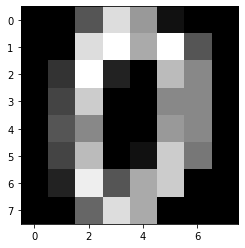

In [ ]:
a_digit = digits.images[0]  # first datapoint

print(f'type:{type(a_digit)} shape:{a_digit.shape} size:{a_digit.size}\n')
print(a_digit)

plt.imshow(a_digit, cmap='gray')


Agora vamos visualizar algumas instâncias de ``digits``. Em ``target`` temos o *label* de cada instância.

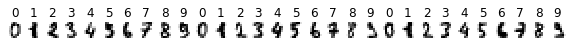

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=30, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f'{label}')

Criação dos Conjuntos de Treinamento e Teste
--

Uma abordagem comum em problemas de ML é dividir os dados (instâncias) em dois tipos de conjunto de dados: treinamento (*train*) e teste (*test*). Na abordagem supervisionada, o conjunto de treinamento é usado para treinar o modelo classificador, fornecendo instâncias conhecidas e seus respectivos rótulos (identificação da classe). Já o conjunto de teste é utilizado para avaliar o classificador em termos generalização para instâncias desconhecidas, i.e., instâncias independentes **não usadas no treinamento**.

Existem diferentes abordagens para fazer esse particionamento: 
- $50\%$ das instâncias para treinamento e $50\%$ para teste;     
- $70\%$ das instâncias para treinamento e $30\%$ para teste;     
- $90\%$ das instâncias para treinamento e $10\%$ para teste;
- Etc.     

``Sklearn`` oferece a função ``train_test_split`` para esse fim.

Mas, antes de aplicar o particionamento, precisamos preparar os dados, transformando cada imagem representada por um *array* 2-D $8 \times 8$ de valores *grayscale* em um *array* unidimensional de 64 valores.



In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # flatten the images

print(f'n_samples:{n_samples} data shape:{data.shape}')

n_samples:1797 data shape:(1797, 64)


Agora o particionamento em si, separando $70\%$ das imagens para treino e $30\%$ para teste.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

print(f'Train data -> type:{type(X_train)} shape:{X_train.shape} size:{X_train.size}\n')
print(f'Test data  -> type:{type(X_test)} shape:{X_test.shape} size:{X_test.size}\n')

Train data -> type:<class 'numpy.ndarray'> shape:(1257, 64) size:80448

Test data  -> type:<class 'numpy.ndarray'> shape:(540, 64) size:34560



Treinamento
--

Para efetuar o treinamento precisamos selecionar um classificador. A ``sklearn`` oferece vários classificadores. Depois de criado o objeto que representa o classificador, instanciando a respectiva classe, basta chamar o método ``fit``. Na criação do classificador podem ser passados hiperparâmetros.

Nesse exemplo vamos instanciar um classificador SVC (*C-Support Vector Classifier*). Esse é um classificador do tipo **SVM** (*Support Vector Machine*), modelos de aprendizado supervisionado desenvolvidos por **Vladimir Vapniki** no Bell Labs em meados dos anos 1990. São modelos robustos e amplamente utilizados, tanto em tarefas de classificação quanto análise de regressão.

SVM mapeia os exemplos de treinamento para pontos em um espaço de forma a maximizar a largura da lacuna (margem) entre as duas categorias (classes). Novos exemplos são então mapeados para o mesmo espaço e a preditos para pertencer à categorai baseando-se em qual lado da lacuna eles são postos. A separação é feita por um hiperplano.

Os parâmetros mais relevantes para o algoritmo SVM são ``kernel``, ``C``, ``gamma``, ``degree`` e ``coef0``.

Vamos utilizar os valores *default*, isto é, 
```
  C = 1.0 
  kernel = 'rbf' # Radial Basis Function (RBF) 
  degree = 3 
  gamma = 'scale' 
  coef0 = 0.0
```

$rbf = exp(-\gamma \|x - x'\|^2)$, onde $\gamma$ é dado pelo parâmetro ``gamma``, devendo ser $> 0$ e define quanto de influência tem um exemplo de treinamento.

In [ ]:
from sklearn import svm

clf = svm.SVC()  # Create a classifier C-Support Vector Classifier (SVC)

print(f'type: {type(clf)}')

clf.fit(X_train, y_train)  # Learning

type: <class 'sklearn.svm._classes.SVC'>


SVC()


---

> ⚠️ <font color="#ffb31a">**Atenção**</font>: A operação ``fit`` escala pelo menos em tempo **quadrático** com o número de amostras ($O (n^2)$) e pode ser **impraticável além de dezenas de milhares de amostras**.


---


Predição
--

Uma vez treinado o classificador podemos utilizá-lo para classificar (predizer) as instâncias de teste.

In [ ]:
predicted = clf.predict(X_test)

Podemos exibir o resultados de algumas predições: são mostrados o *label* predito pelo classificador e a instância de teste logo abaixo.

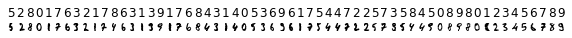

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=60, figsize=(10, 3))

for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{prediction}")

Avaliação e Métricas
--

Como pudemos observar o classificador teve um ótimo desempenho. Mas ele errou? Quantos erros cometeu? Com quais classes?

Para esse tipo de avaliação aplicamos medidas estatísticas ou métricas de classificação: *accuracy*, *precision*, *recall*, *f1-score*, etc.

Seja $TP = True\ Positive$, $FP = False\ Positive$, $TN = True\ Negative$ e $FN = False\ Negative$.

A métrica *accuracy* normalmente é expressa em percentual e pode ser definida como sendo

$accuracy = \frac{classificações\ corretas} {todas\ as\ classificações}$

> ou ainda

$accuracy = \frac{TP + TN} {TP + TN + FP + FN}$


Já, *precision*, ou *positive predictive value*, é dada por

  $precision = \frac{TP} {TP + FP}$

A *recall*, ou *true positive rate* ou *sensitivity*:

$recall = \frac{TP} {TP + FN}$

A *support* é o número de amostras de resposta verdadeira naquela classe.

O *score* $F_\beta$ é uma média harmônica ponderada de *precision* e *recall*, utilizando pesos. $F_1$ (ou *F-measure*)  é um caso particular de $F_\beta$. Melhor valor em $1$ e pior em $0$.

$F_1 = \frac{2TP} {2TP + FP + FN}$


In [ ]:
from sklearn import metrics

print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17
           3       0.93      0.72      0.81        18
           4       1.00      0.90      0.95        20
           5       0.86      1.00      0.92        18
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        19
           8       0.77      1.00      0.87        17
           9       1.00      0.89      0.94        18

    accuracy                           0.95       180
   macro avg       0.96      0.95      0.95       180
weighted avg       0.96      0.95      0.95       180




Outra ferramenta bastante útil para avaliar o modelo classificador é a **matriz de confusão** ou *matriz de erro*. É uma distribuição tabular onde cada linha representa uma classe real e cada coluna representa a quantidade de instâncias na classe predita. Fica relativamente fácil identificar visualmente quais as classes estão sendo confundidas. Em uma classificação perfeita todos os valores da matriz serão zero, com exceção da diagonal principal.

Confusion matrix:
[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  2  0  0  3  0]
 [ 0  0  0  0 18  0  0  0  2  0]
 [ 0  0  0  0  0 18  0  0  0  0]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  0  0  0  0 19  0  0]
 [ 0  0  0  0  0  0  0  0 17  0]
 [ 0  0  0  1  0  1  0  0  0 16]]


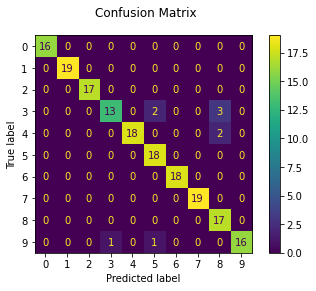

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

disp.figure_.suptitle("Confusion Matrix")

print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

---
<font color="#ffb31a">Fabio Alexandre **SPANHOL**</font> <faspanhol@gmail.com>

<font color="#cccccc">*Updated: dec 04 2022*</font>